In [1]:
#doing things with data
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

import env
import wrangle as w
import explore as e
import prepare as p

import warnings
warnings.filterwarnings("ignore")

In [2]:
# get data
df = w.wrangle_zillow()
df

creating df and exporting csv


,taxvalue,bedrooms,bathrooms,sqft,built,fips,Orange,Ventura
4,296425.0,4.0,2.0,3633.0,2005.0,LA,0,0
6,847770.0,3.0,4.0,1620.0,2011.0,LA,0,0
7,646760.0,3.0,2.0,2077.0,1926.0,LA,0,0
11,5328.0,0.0,0.0,1200.0,1972.0,LA,0,0
14,6920.0,0.0,0.0,171.0,1973.0,LA,0,0
...,...,...,...,...,...,...,...,...
2152856,422400.0,4.0,4.0,4375.0,2015.0,LA,0,0
2152858,960756.0,4.0,3.0,2262.0,2015.0,Orange,1,0
2152859,536061.0,4.0,4.5,3127.0,2014.0,Orange,1,0
2152861,424353.0,3.0,2.5,1974.0,2015.0,Orange,1,0


In [3]:
# split data
train, validate, test = p.split_data(df)
train

,taxvalue,bedrooms,bathrooms,sqft,built,fips,Orange,Ventura
731916,148309.0,3.0,2.0,1488.0,1980.0,LA,0,0
1286889,199476.0,2.0,1.0,864.0,1947.0,LA,0,0
1105466,921624.0,4.0,3.0,2532.0,1987.0,LA,0,0
1535462,311969.0,2.0,1.0,1144.0,1951.0,LA,0,0
1948233,1155354.0,3.0,3.5,2840.0,2005.0,Orange,1,0
...,...,...,...,...,...,...,...,...
1650719,96289.0,1.0,1.0,811.0,1942.0,LA,0,0
592897,870000.0,4.0,3.5,2468.0,1981.0,Ventura,0,1
1483205,649000.0,4.0,3.0,2610.0,1982.0,Orange,1,0
1478881,44892.0,3.0,1.0,1264.0,1942.0,LA,0,0


In [4]:
## scale
#X_train_scaled, X_validate_scaled, X_validate_scaled, y_train, y_validate, y_test = p.scaled_df(train, validate, test)
#X_train_scaled

In [5]:
train = train.drop(columns=['Orange','Ventura'])

In [6]:
train

,taxvalue,bedrooms,bathrooms,sqft,built,fips
731916,148309.0,3.0,2.0,1488.0,1980.0,LA
1286889,199476.0,2.0,1.0,864.0,1947.0,LA
1105466,921624.0,4.0,3.0,2532.0,1987.0,LA
1535462,311969.0,2.0,1.0,1144.0,1951.0,LA
1948233,1155354.0,3.0,3.5,2840.0,2005.0,Orange
...,...,...,...,...,...,...
1650719,96289.0,1.0,1.0,811.0,1942.0,LA
592897,870000.0,4.0,3.5,2468.0,1981.0,Ventura
1483205,649000.0,4.0,3.0,2610.0,1982.0,Orange
1478881,44892.0,3.0,1.0,1264.0,1942.0,LA


# 3
- using a pairplot to visualize all the pairwise relationships

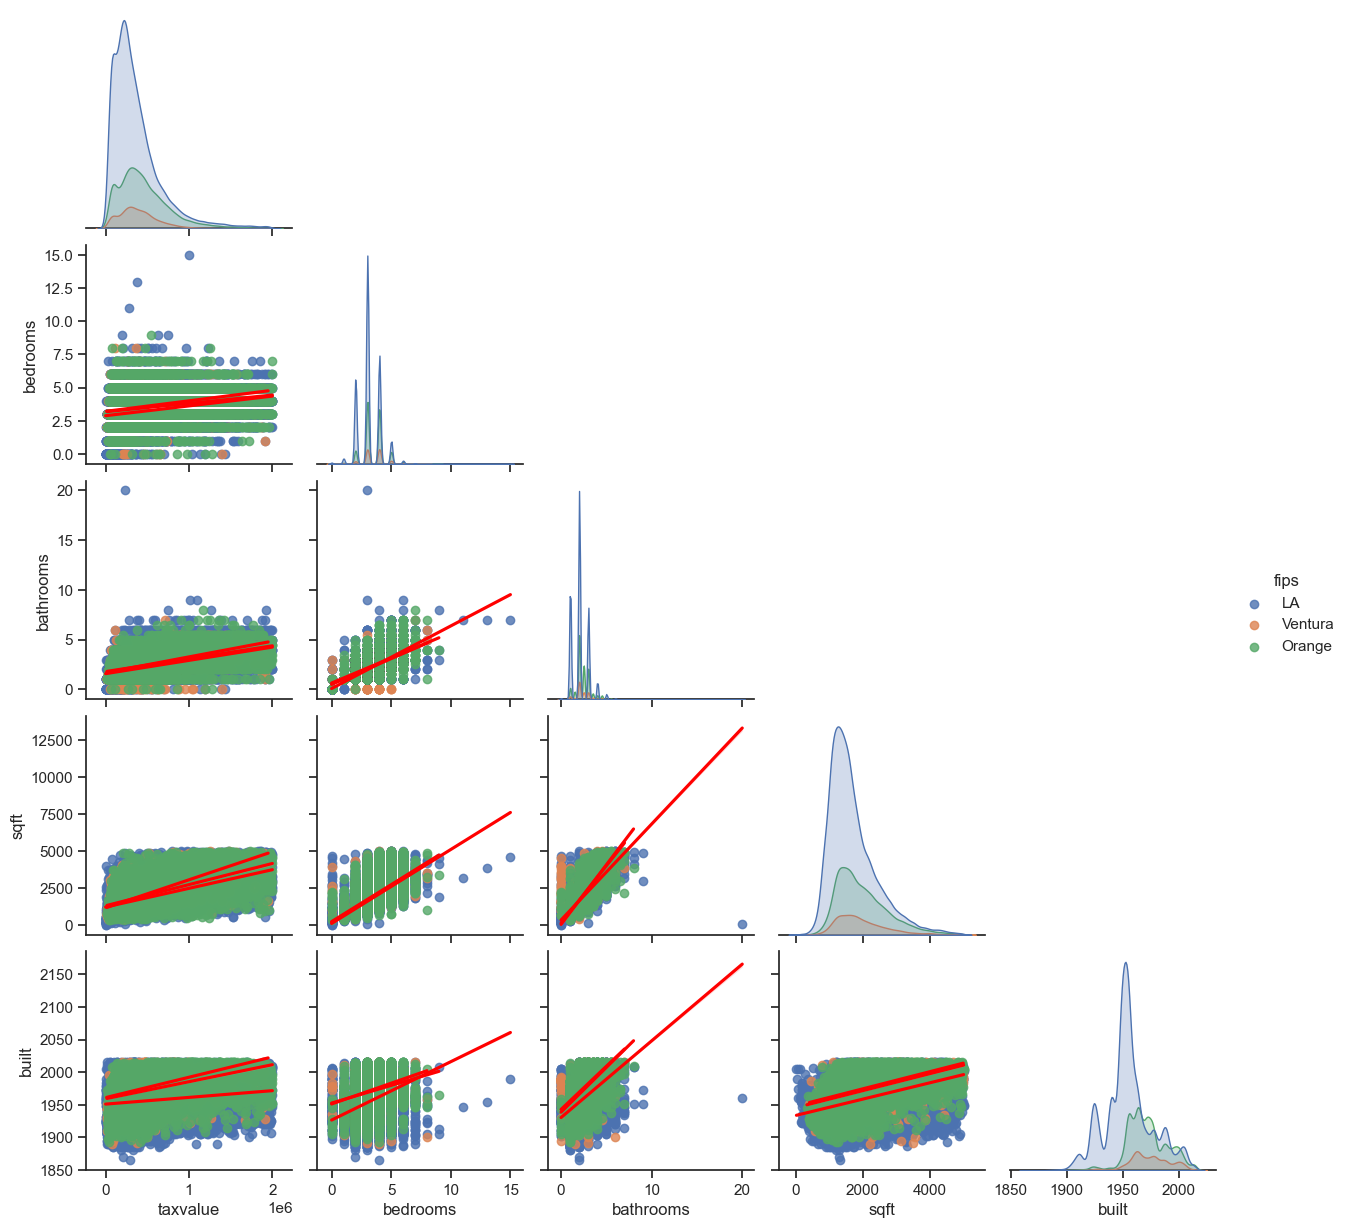

In [7]:
e.plot_variable_pairs(train.sample(100_000))

# visualize categorical and continuous variables

In [8]:
#plot_categorical_and_continuous_vars(train, categorical_var, continuous_var)

### taxvalue (continuous) and bedrooms (categorical)

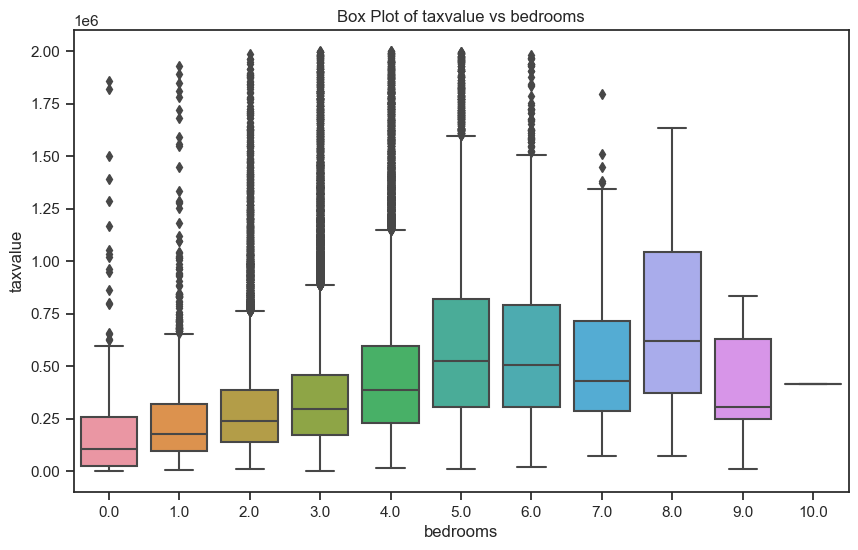

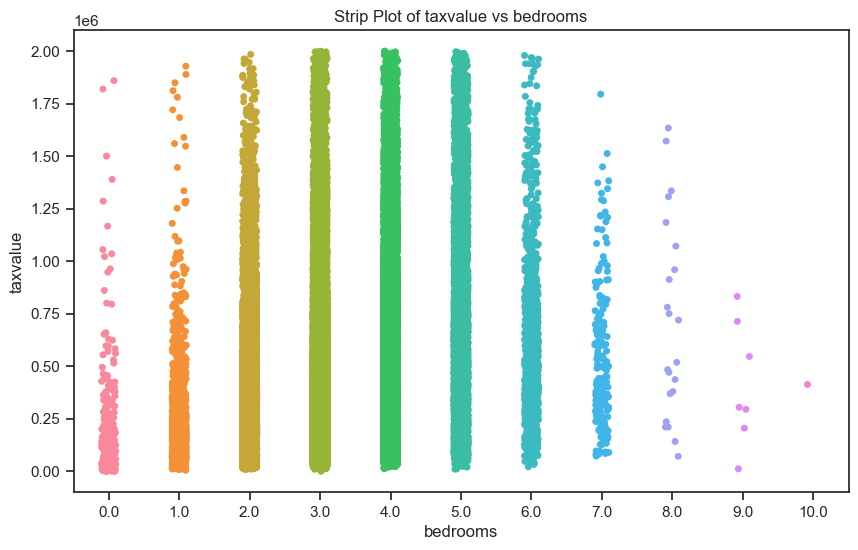

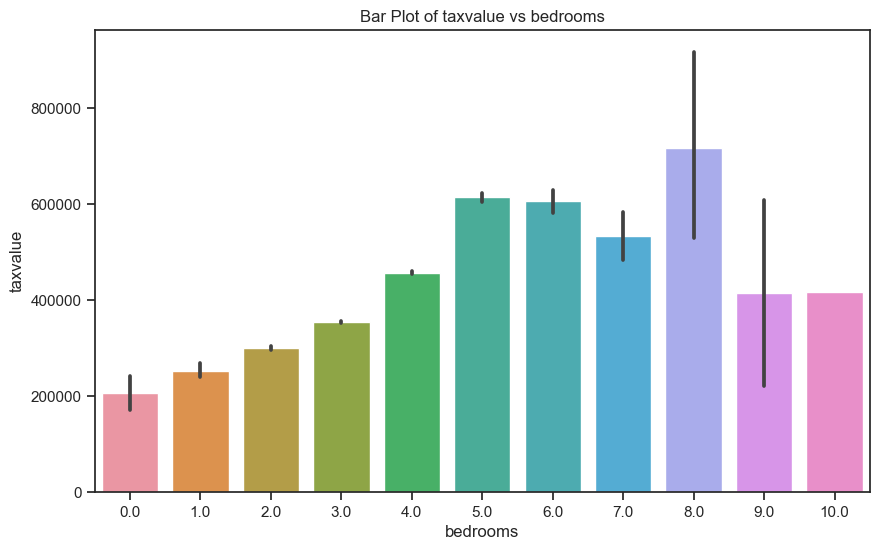

In [9]:
e.plot_categorical_and_continuous_vars(train.sample(120_000), 'bedrooms', 'taxvalue')

### taxvalue (continuous) and bathrooms (categorical)

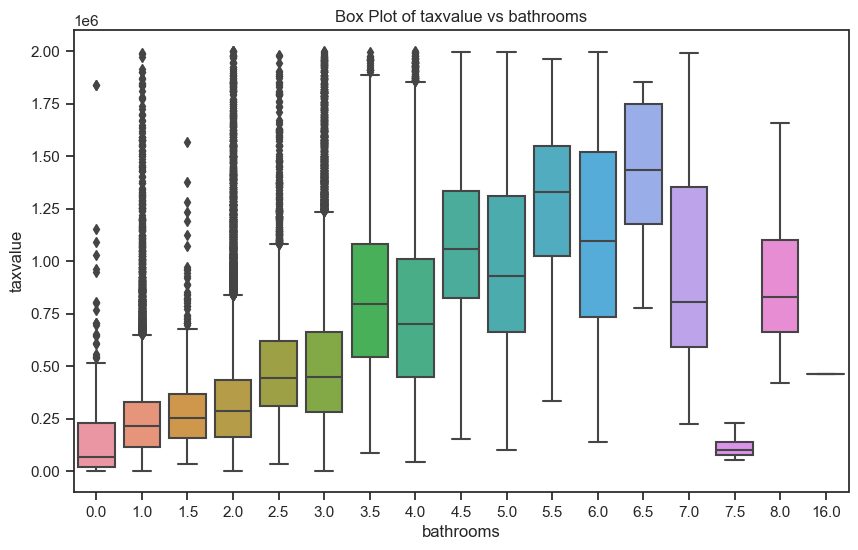

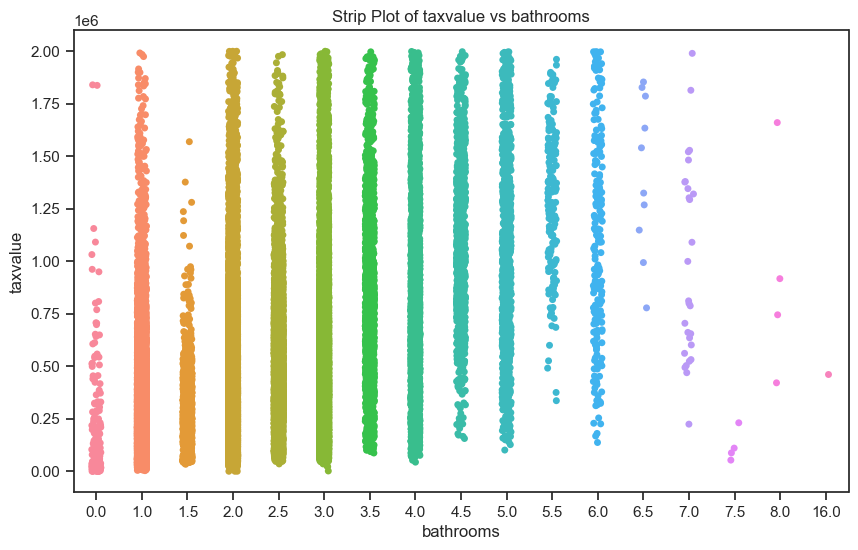

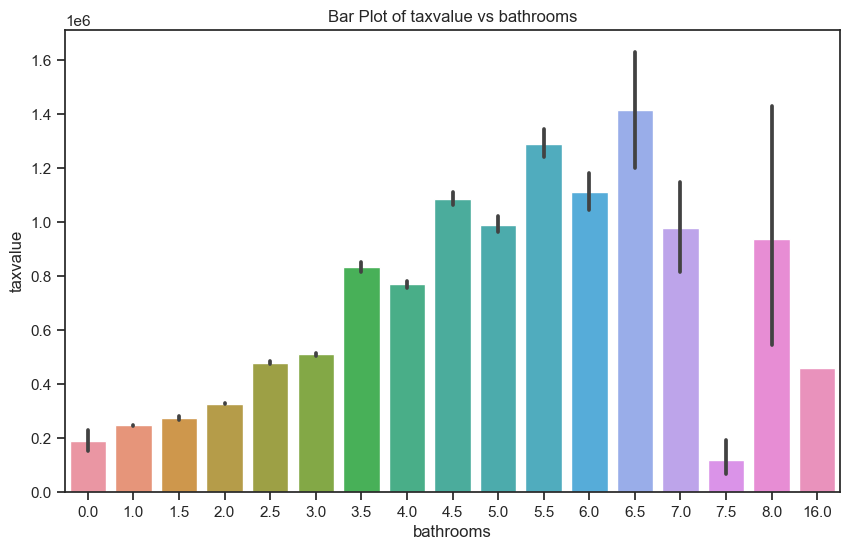

In [10]:
e.plot_categorical_and_continuous_vars(train.sample(120_000), 'bathrooms', 'taxvalue')

### taxvalue (continuous) and locations (categorical)

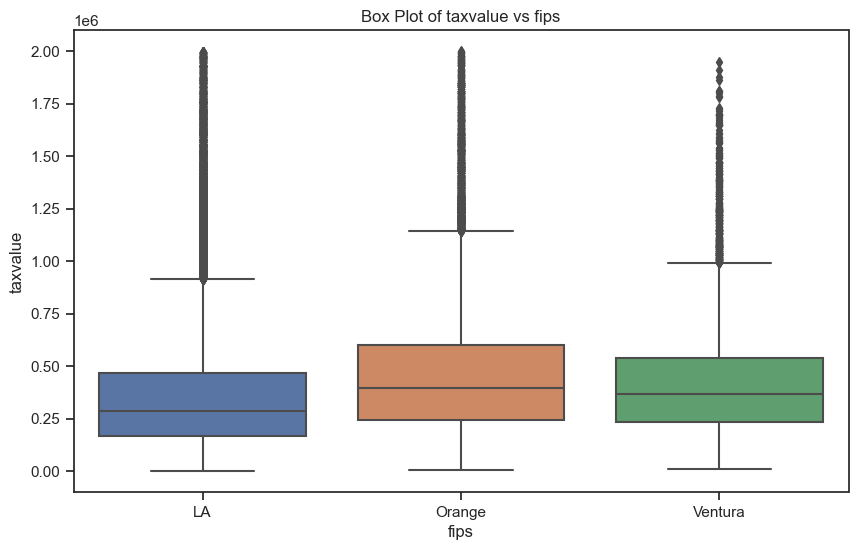

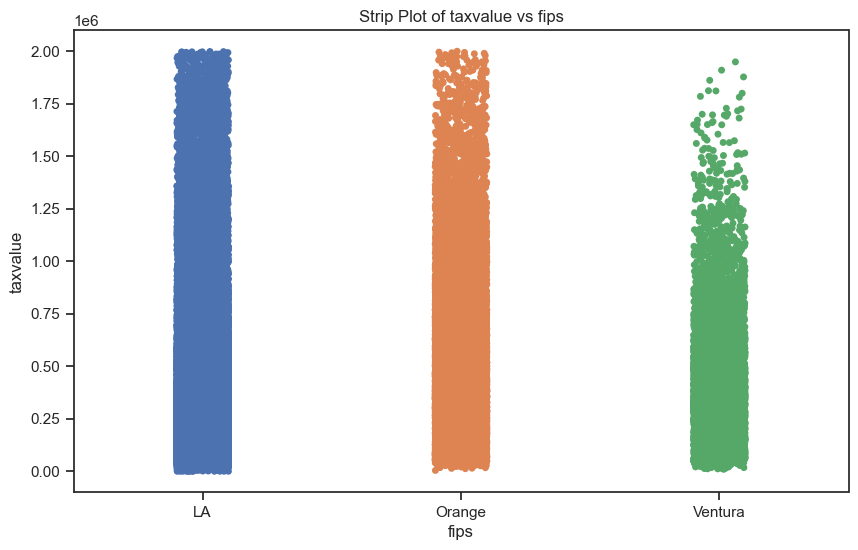

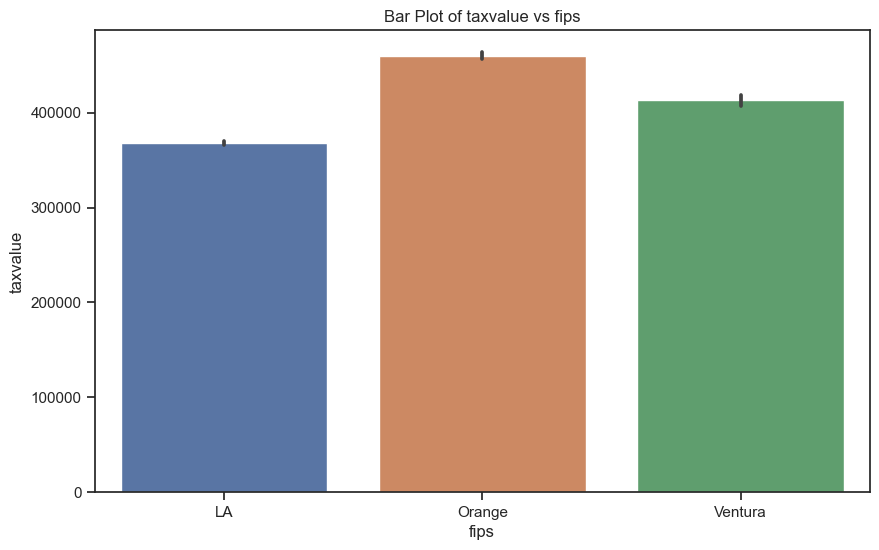

In [11]:
e.plot_categorical_and_continuous_vars(train.sample(120_000), 'fips', 'taxvalue')

### sqft (continuous) and bedrooms (categorical)

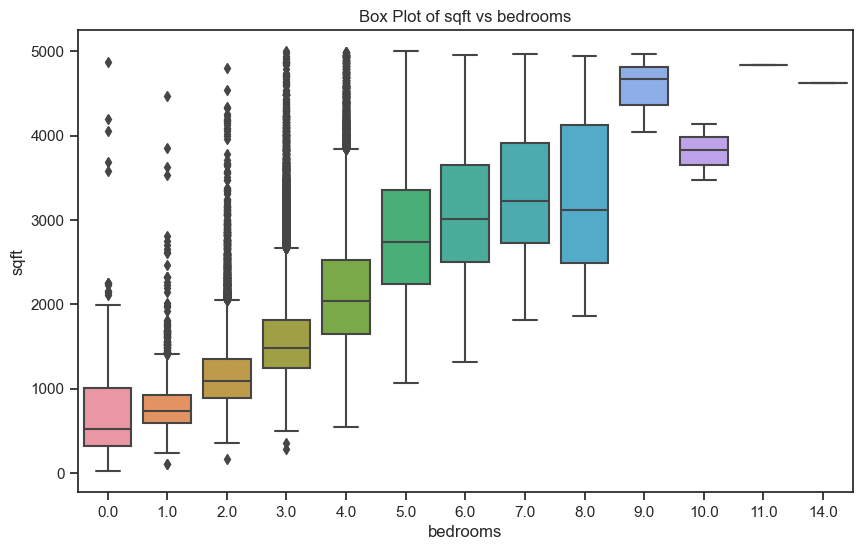

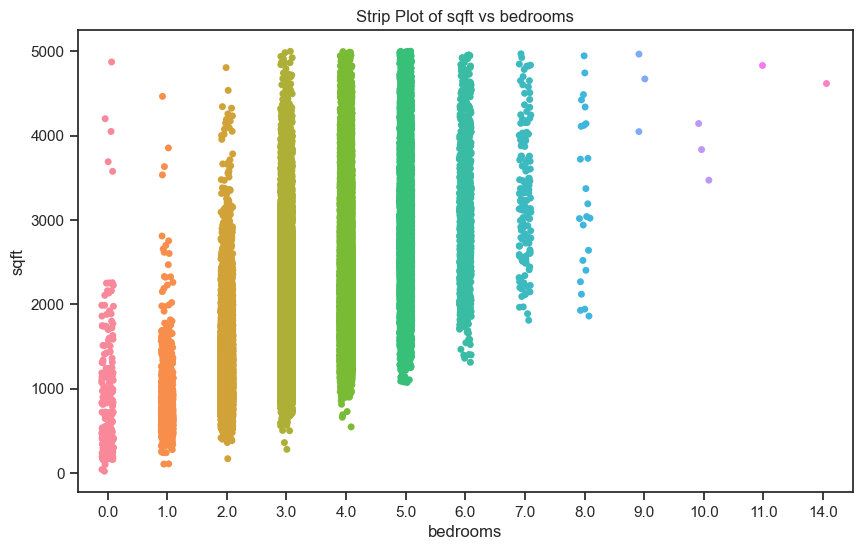

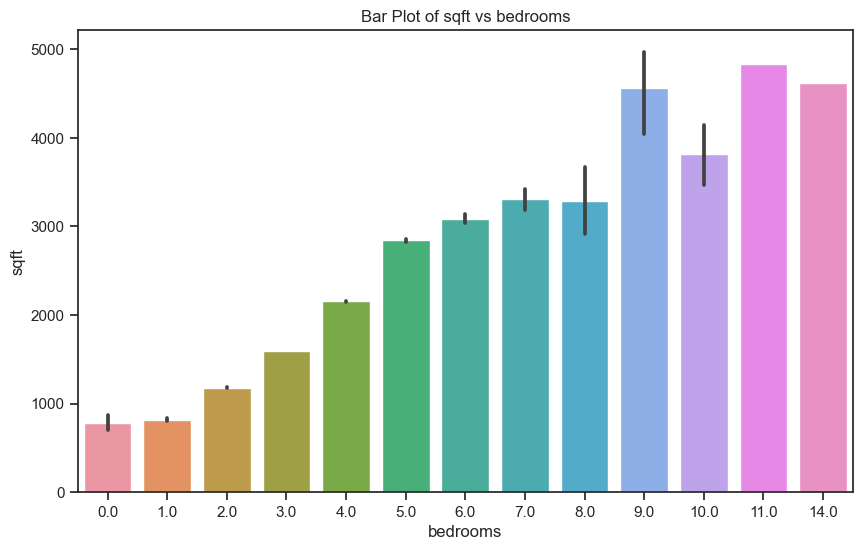

In [12]:
e.plot_categorical_and_continuous_vars(train.sample(120_000), 'bedrooms', 'sqft')

### sqft (continuous) and bathrooms(categorical)



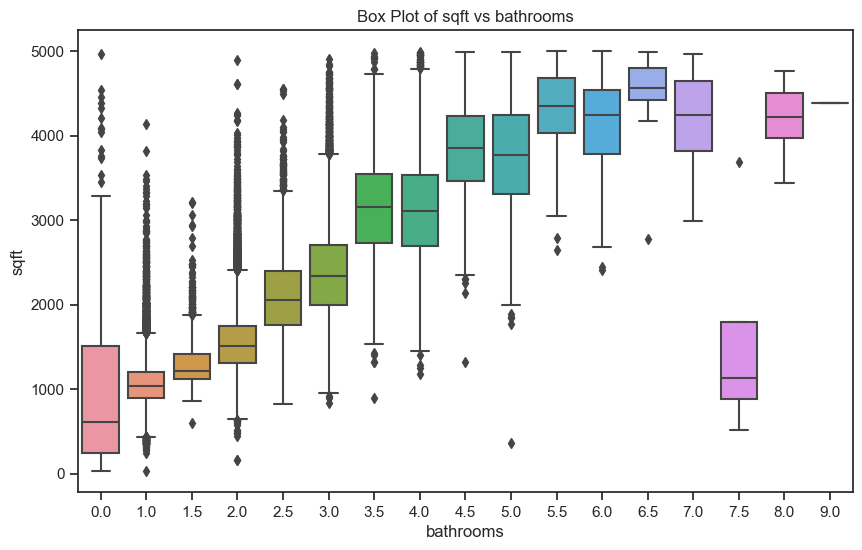

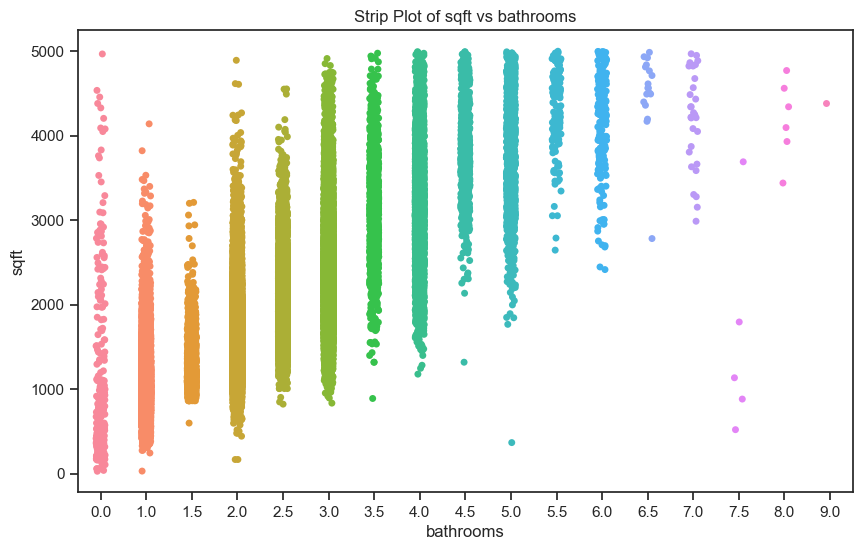

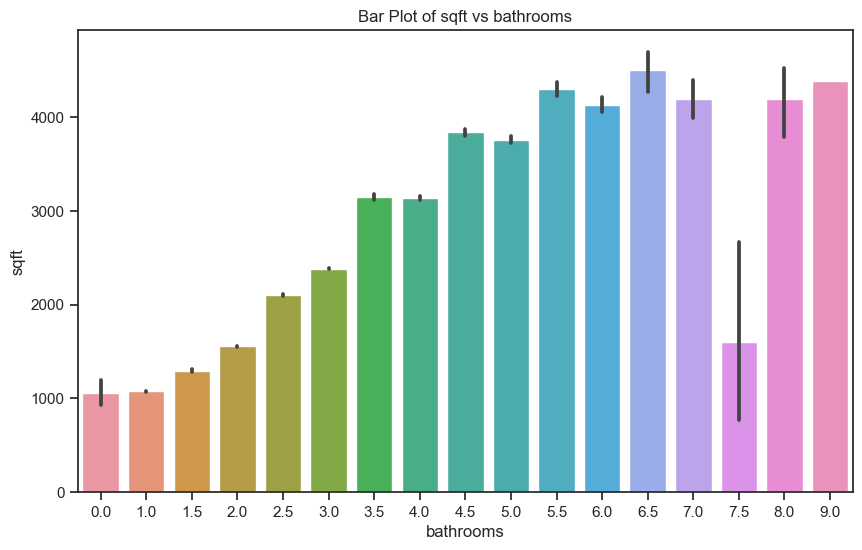

In [13]:
e.plot_categorical_and_continuous_vars(train.sample(120_000), 'bathrooms', 'sqft')

### sqft (continuous) and locations (categorical)

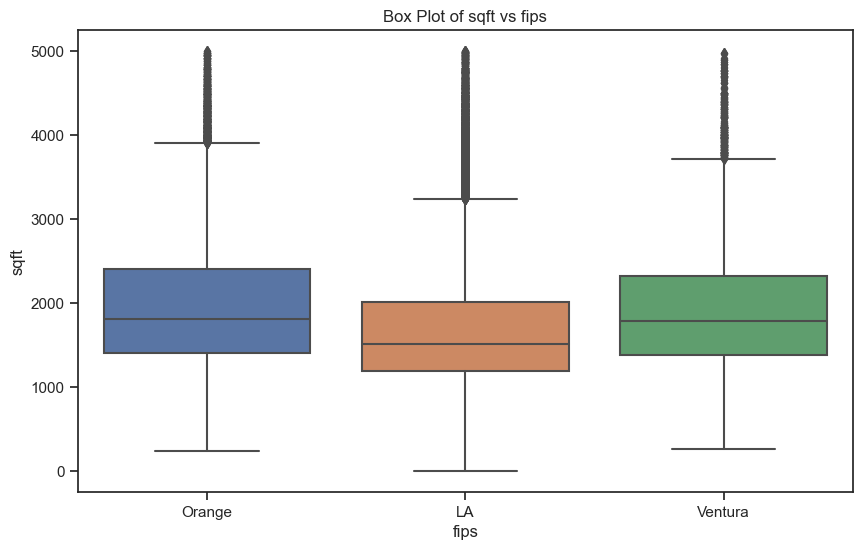

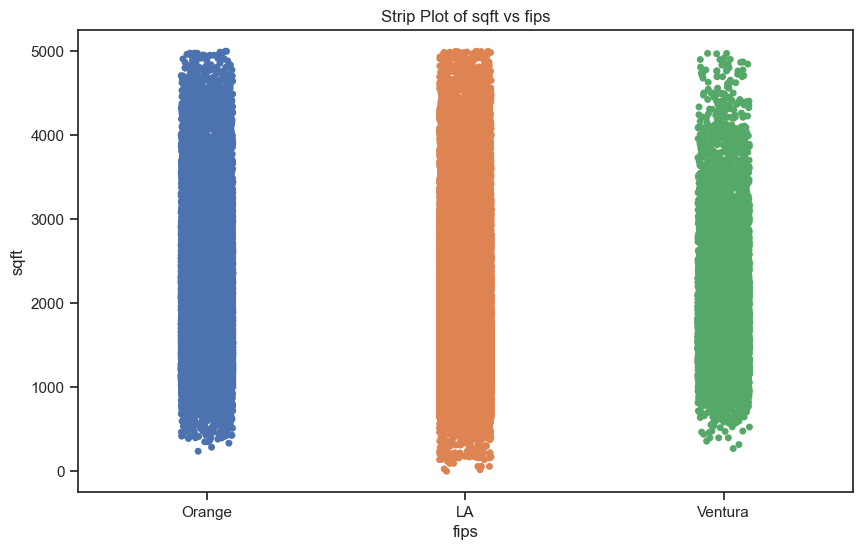

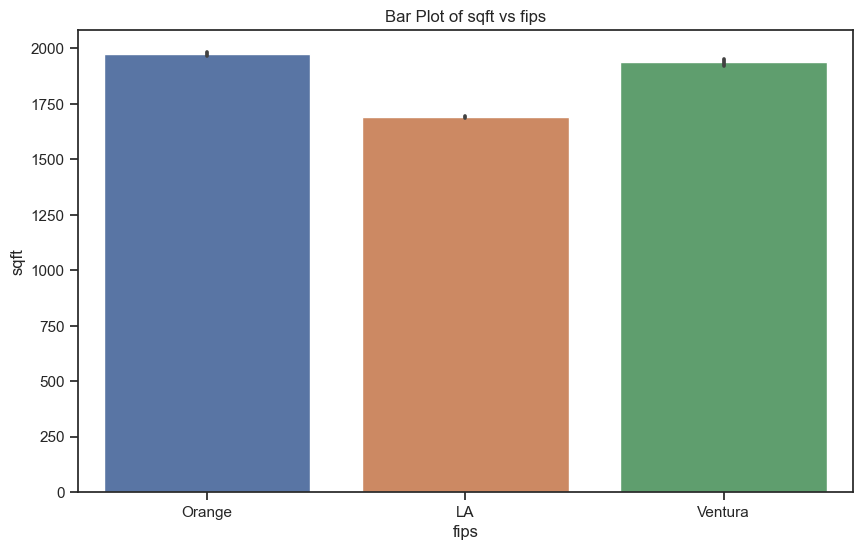

In [14]:
e.plot_categorical_and_continuous_vars(train.sample(120_000), 'fips', 'sqft')

### built (continuous) and bedroom (categorical)


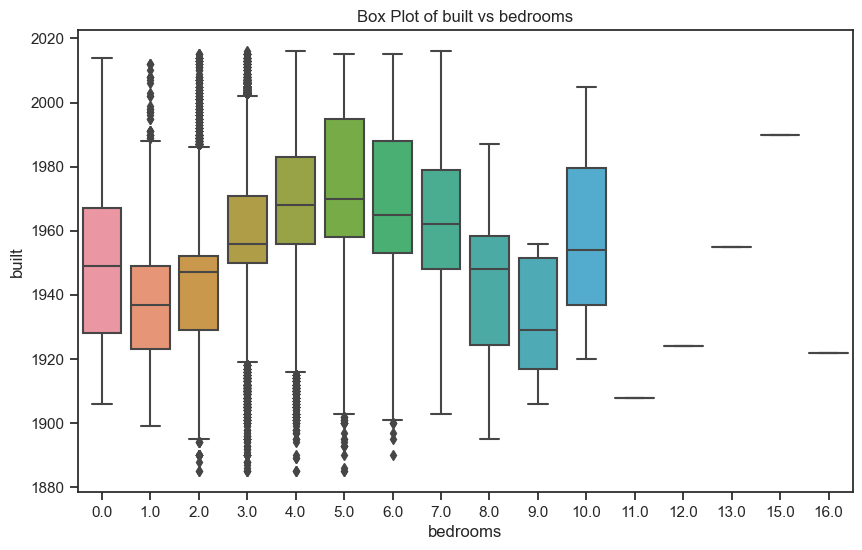

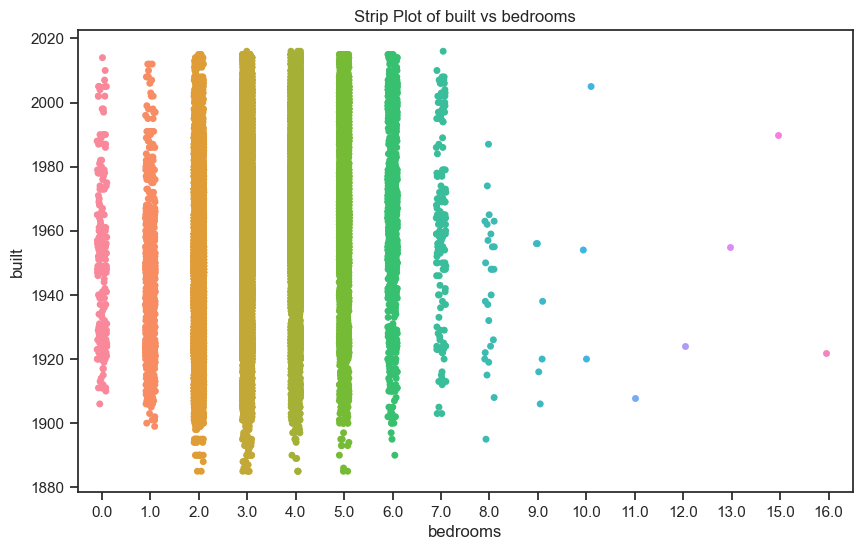

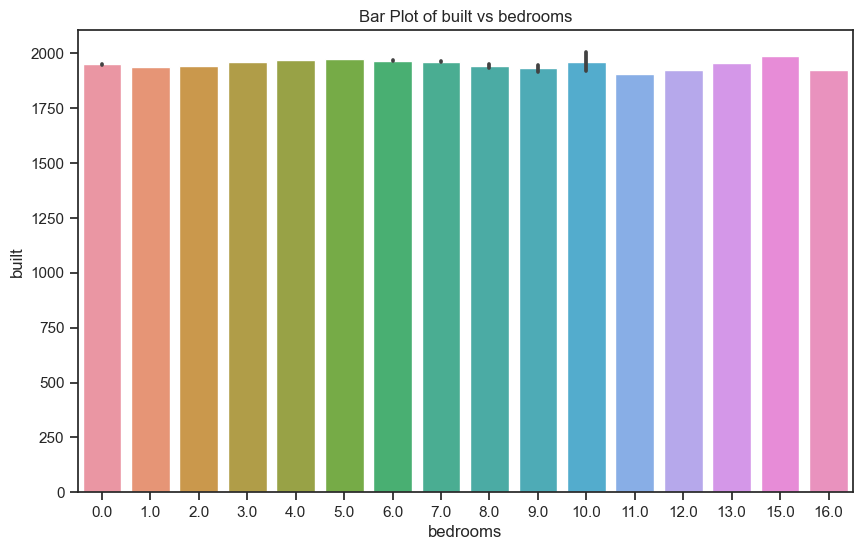

In [15]:
e.plot_categorical_and_continuous_vars(train.sample(120_000), 'bedrooms', 'built')

### built (continuous) and bathrooms (categorical)


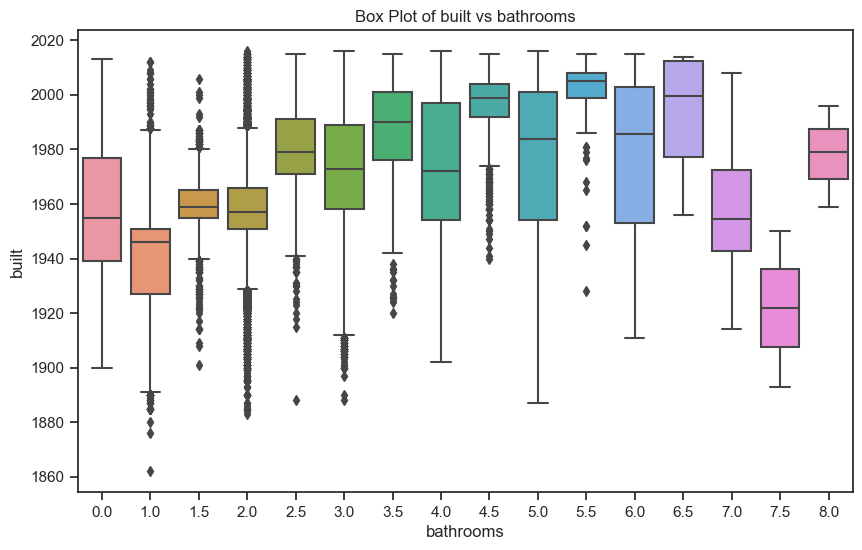

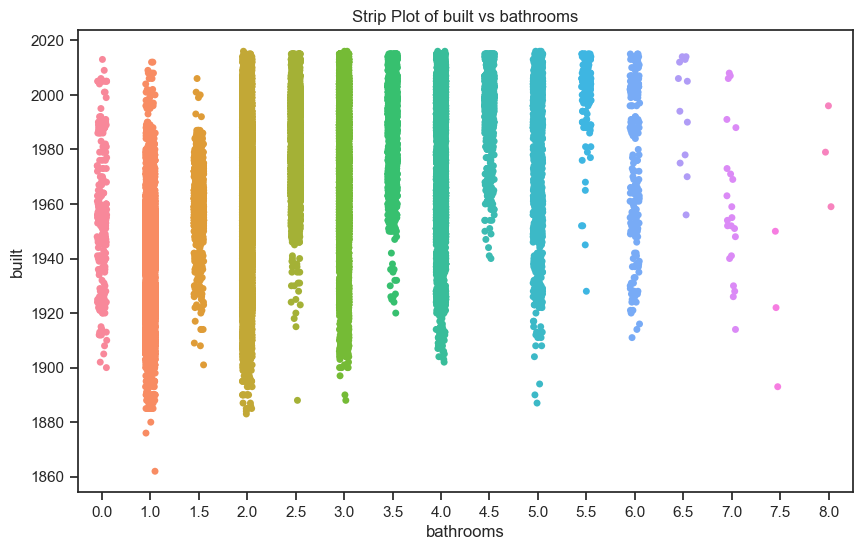

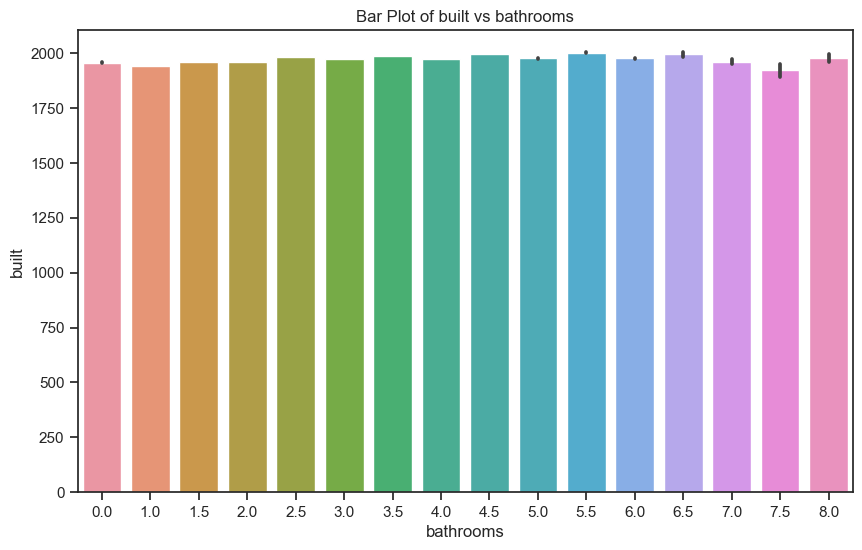

In [16]:
e.plot_categorical_and_continuous_vars(train.sample(120_000), 'bathrooms', 'built')

### built (continuous) and location (categorical)


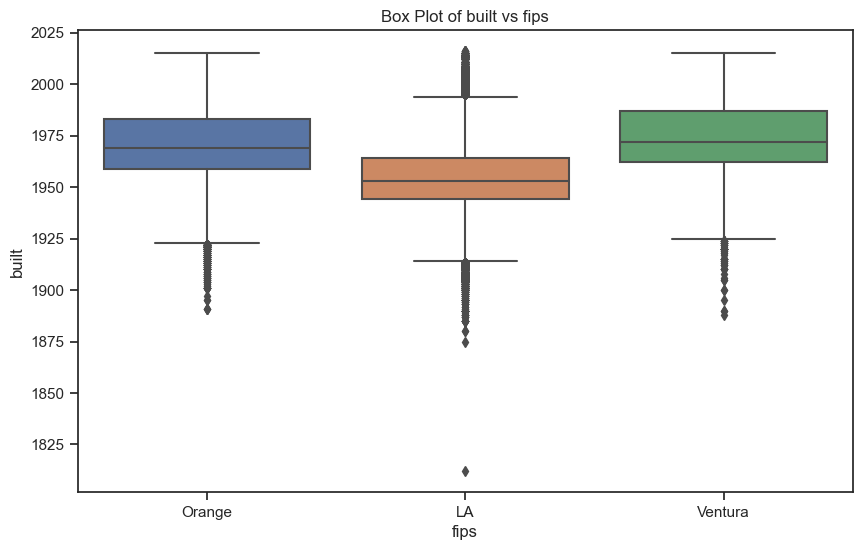

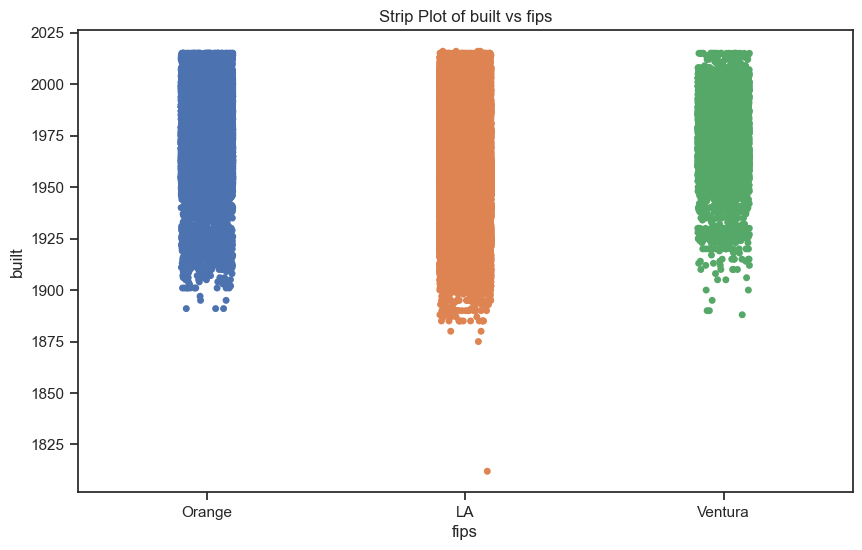

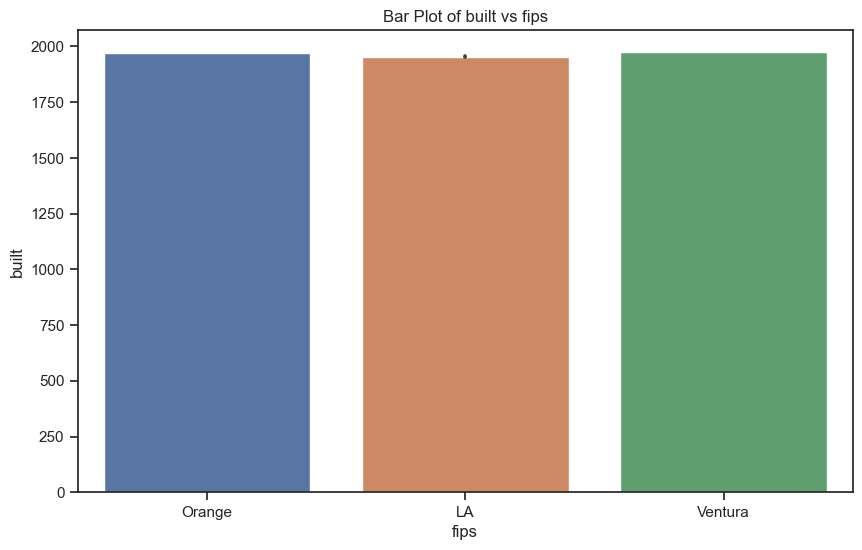

In [17]:
e.plot_categorical_and_continuous_vars(train.sample(120_000), 'fips', 'built')

# Visualization takeaways

# Come up with some initial hypotheses based on your goal of predicting property value.
 $H_{0}$ Year built does not influence price.
    
 $H_{a}$ Year built does influence price.
 
---------    
 $H_{0}$ Number of Bedrooms has no effect on tax value.
    
 $H_{a}$ As number of bedrooms increases price increases.
 
---------    
 $H_{0}$ Location does not affect price.
    
 $H_{a}$ Location does affect price.
 
---------    
 $H_{0}$ Number of Bathrooms does not influence price.
    
 $H_{a}$ Number of bathrooms does influence price.
 
---------    
 $H_{0}$ Sqft does not influence price.
    
 $H_{a}$ Sqft does influence price.

# Explore hypothesis 1
𝐻0
  Year built does not influence price.

𝐻𝑎
  Year built does influence price.

- train.built (continuous) vs. train.taxvalue(continuous)

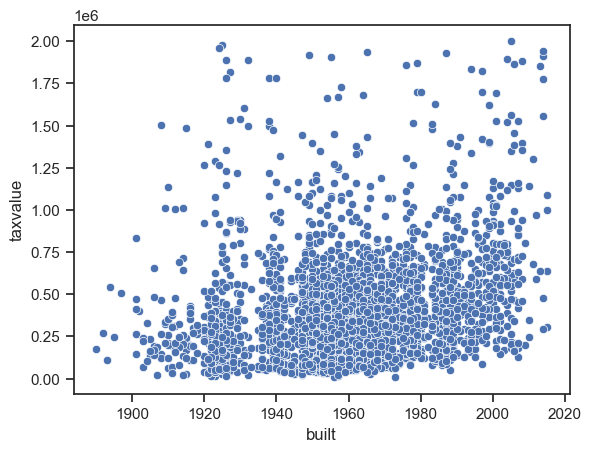

In [18]:
# visualize
sns.scatterplot(data=train.sample(3_000), x='built', y='taxvalue')
plt.show()

In [19]:
r,p = pearsonr(train.built, train.taxvalue)
r,p

(0.266809760927341, 0.0)

We reject the null hypothesis. There is a relationship between year built and value.

# Explore hypothesis 2
𝐻0
  Number of Bedrooms has no effect on tax value.

𝐻𝑎
  Number of bedrooms does effect price.

- bedrooms (categorical) vs. tax value(continuous)

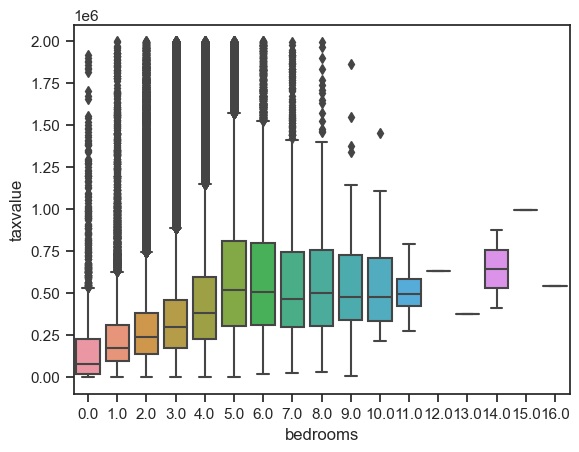

In [20]:
sns.boxplot(x='bedrooms', y='taxvalue', data=train)
plt.show()

In [21]:
tstat, pval = stats.ttest_ind(train.bedrooms, train.taxvalue)
tstat, pval

(-1438.3213662056041, 0.0)

We reject the null hypothesis. There is a relationship between bedrooms and value.

# Explore hypothesis 3
𝐻0
  Location does not affect price.

𝐻𝑎
  Location does affect price.

- location (categorical) vs. tax value(continuous)

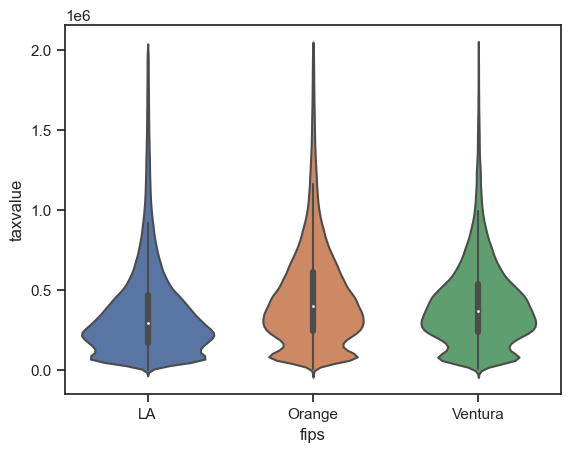

In [22]:
sns.violinplot(x='fips', y='taxvalue', data=train)
plt.show()

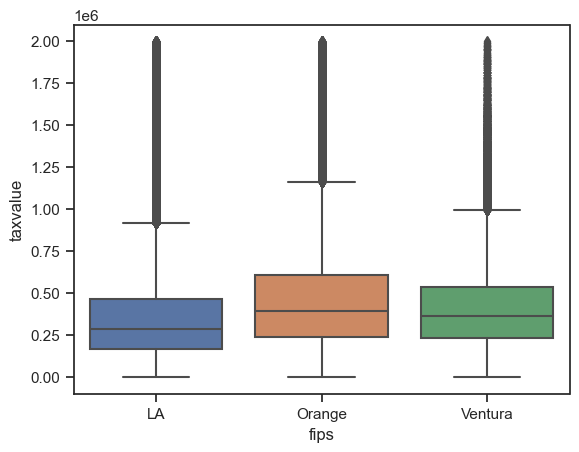

In [23]:
sns.boxplot(x='fips', y='taxvalue', data=train)
plt.show()

- get taxvalue from each location 

In [24]:
la = train[train.fips == 'LA'].taxvalue


In [25]:
orange = train[train.fips == 'Orange'].taxvalue

In [26]:
ventura = train[train.fips == 'Ventura'].taxvalue

- run ANOVA test to compare the means of taxvalue from the three locations

In [27]:
tstat, pval = stats.f_oneway(la, orange, ventura)
tstat, pval

(11517.891854501951, 0.0)

- We reject the null hypothesis and can infer that location does affect price.

# Explore hypothesis 4
𝐻0
  Number of Bathrooms does not influence price.

𝐻𝑎
  Number of bathrooms does influence price.

- bathrooms (categorical) vs. tax value(continuous)

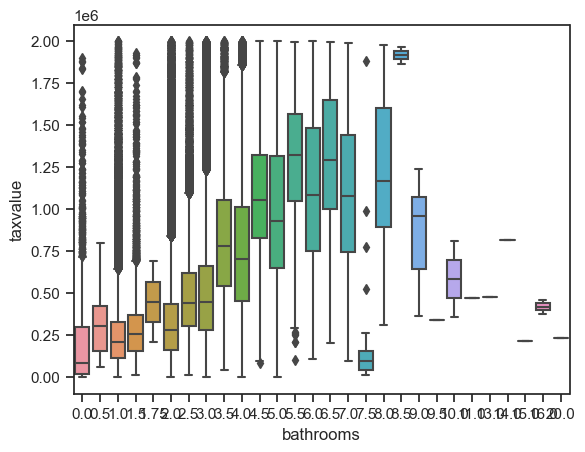

In [28]:
sns.boxplot(x='bathrooms', y='taxvalue', data=train)
plt.show()

In [29]:
tstat, pval = stats.ttest_ind(train.bathrooms, train.taxvalue)
tstat, pval

(-1438.3253616824807, 0.0)

- We reject the null hypothesis and can infer a relationship exists between number of bathrooms and value.

# Explore hypothesis 5
𝐻0
  Sqft does not influence price.

𝐻𝑎
  Sqft does influence price.

- sqft (continuous) vs. tax value(continuous)

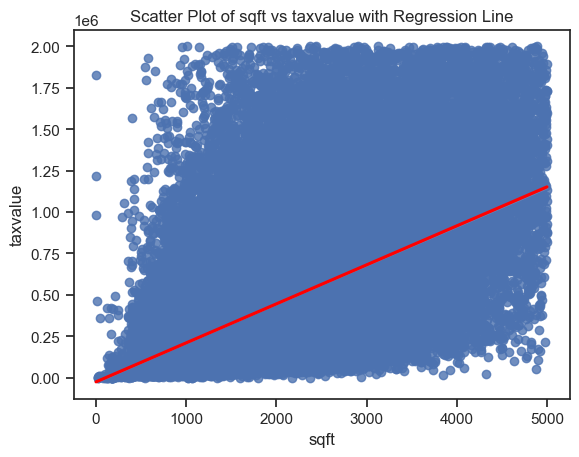

In [31]:
sns.regplot(x='sqft', y='taxvalue', data=train.sample(250_000), line_kws={'color': 'red'})
plt.xlabel('sqft')
plt.ylabel('taxvalue')
plt.title('Scatter Plot of sqft vs taxvalue with Regression Line')
plt.show()


In [32]:
r,p = pearsonr(train.built, train.taxvalue)
r,p

(0.266809760927341, 0.0)

- We reject the null hypothesis and can infer that sqft and taxvalue have a relationship. 

# What independent variables are correlated with the dependent variable, home value?

- taxes are highly correlated with taxvalue. 
- bathrooms and sqft are moderately correlated.
- bedrooms and built are not highly correlated to taxvalue.

In [33]:
train.corr(method='pearson')

,taxvalue,bedrooms,bathrooms,sqft,built
taxvalue,1.000000,0.262445,0.491582,0.568416,0.266810
bedrooms,0.262445,1.000000,0.625317,0.621575,0.375543
bathrooms,0.491582,0.625317,1.000000,0.814961,0.528674
sqft,0.568416,0.621575,0.814961,1.000000,0.482631
built,0.266810,0.375543,0.528674,0.482631,1.000000


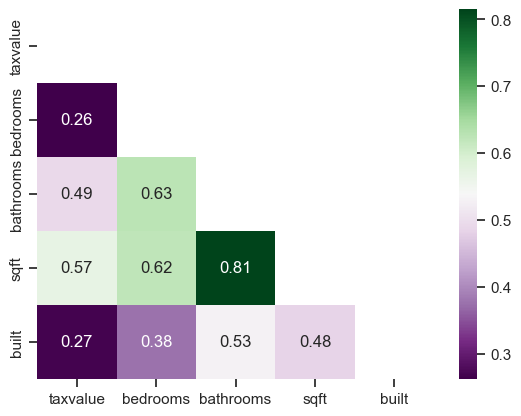

In [34]:
# Correlation heat map
sns.heatmap(train.corr(method='pearson'), cmap='PRGn', annot=True,
           mask=np.triu(train.corr(method='pearson')))
plt.show()

# Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

- bedrooms are moderatly correlated with sqft and bathrooms
    -- and slightly correlated to year built and tax
- bathrooms are moderatly correlated to taxes and year built and bedrooms. It is highly correlated to square feet.
- sqft is moderately correlated to taxes and year built, bedrooms and bathrooms. 
- year built is moderatly correlated to bathrooms and sqft. 